In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade fastai fastcore timm==0.6.13 kaggle pynvml nbdev -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import sys

if 'google.colab' in str(get_ipython()):

    base_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI')

    data_folder =  Path('/content')

else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Path is /Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data')

    base_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI')
    data_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data')


In [ ]:
from pathlib import Path
import sys

# Determine the storage location based on the execution environment
# If running on Google Colab, use Google Drive as storage
if 'google.colab' in str(get_ipython()):
    custom_function_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files') # Your Google Drive

    sys.path.append(str(custom_function_folder))
    model_folder = Path('/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data') # Google drive folder where you want to save model and logs
    model_folder.mkdir(parents=True, exist_ok=True)
    project_folder = model_folder
    kaggle_api_folder = base_folder/'Data/.kaggle'
    archive_folder = data_folder/'archive'
    archive_folder.mkdir(parents=True, exist_ok=True)

# If running locally, specify a different path
else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Path is /Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files')
    custom_function_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Custom_files') # Your Google Drive

    sys.path.append(str(custom_function_folder))
    model_folder = Path('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data') # Google drive folder where you want to save model and logs
    model_folder.mkdir(parents=True, exist_ok=True)
    kaggle_api_folder = base_folder/'Data/.kaggle'
    archive_folder = data_folder/'archive'
    archive_folder.mkdir(parents=True, exist_ok=True)

In [ ]:
! chmod 600 /content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle/kaggle.json
!ls -la /content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle

total 1
-rw------- 1 root root 70 Nov 27 02:27 kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab_Notebooks/paddy_disease_prediction_FastAI/Data/.kaggle'

In [ ]:
from fastai.vision.all import *
from kaggle import api
from fastcore.parallel import *
import timm
from zipfile import ZipFile

In [ ]:
import fastai; fastai.__version__

'2.7.13'

In [ ]:
! kaggle competitions download -c inclassplantpathologysmallf23 -p {archive_folder}

 99% 549M/552M [00:26<00:00, 22.4MB/s]
100% 552M/552M [00:26<00:00, 21.9MB/s]


In [ ]:
!ls -la /content/archive

total 565168
drwxr-xr-x 2 root root      4096 Nov 27 22:22 .
drwxr-xr-x 1 root root      4096 Nov 27 22:21 ..
-rw-r--r-- 1 root root 578718618 Nov 22 11:46 inclassplantpathologysmallf23.zip


In [ ]:
file = archive_folder/'inclassplantpathologysmallf23.zip'
with ZipFile(file , 'r') as f:
    filenames = f.namelist()

In [ ]:
with ZipFile(file ,'r') as f:
 f.extractall(path = data_folder)

In [ ]:
train_path = data_folder/'train'
test_path = data_folder/'test'

In [ ]:
train_files = get_image_files(train_path)
test_files = get_image_files(test_path)

(600, 400)


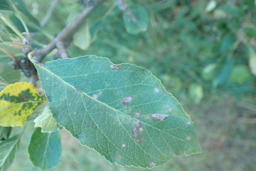

In [ ]:
sample_image = PILImage.create(train_files[0])
print(sample_image.size)
sample_image.to_thumb(256)

In [ ]:
from fastcore.parallel import *

In [ ]:
def get_sizes(image):
    return PILImage.create(image).size

In [ ]:
sizes = parallel(get_sizes, train_files, progress=True)

In [ ]:
pd.Series(sizes).value_counts()

(600, 400)    12409
(600, 450)      627
(600, 600)        3
(450, 600)        2
(600, 337)        1
dtype: int64

In [ ]:
df = pd.read_csv(data_folder/'train.csv')
df.head()

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13042 entries, 0 to 13041
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   13042 non-null  object
 1   labels  13042 non-null  object
dtypes: object(2)
memory usage: 203.9+ KB


In [ ]:
df.iloc[0:10, ]

,image,labels
0,train_image_1.jpg,powdery_mildew
1,train_image_2.jpg,scab
2,train_image_3.jpg,scab frog_eye_leaf_spot
3,train_image_4.jpg,powdery_mildew
4,train_image_5.jpg,complex
5,train_image_6.jpg,rust
6,train_image_7.jpg,scab frog_eye_leaf_spot
7,train_image_8.jpg,scab frog_eye_leaf_spot
8,train_image_9.jpg,frog_eye_leaf_spot
9,train_image_10.jpg,frog_eye_leaf_spot


In [ ]:
# def get_x(df): return str(small_train_images) + '/' + (df['image'])
def get_x(df):
  return data_folder/'train/train'/df['image']
def get_y(df):
  return df['labels'].split(' ')
dblock = DataBlock(get_x= get_x,
                   get_y = get_y,
                   splitter = RandomSplitter(seed = 42))
dsets = dblock.datasets(df)
dsets.train[15]

(Path('/content/train/train/train_image_10535.jpg'), ['rust', 'complex'])

In [ ]:
import gc
def free_memory():
    """
    Attempts to free up memory by deleting variables and running Python's garbage collector.
    """
    gc.collect()
    for device_id in range(torch.cuda.device_count()):
        torch.cuda.set_device(device_id)
        torch.cuda.empty_cache()
    gc.collect()

In [ ]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                   get_x= get_x,
                   get_y = get_y,
                  splitter = RandomSplitter(seed = 42))
dsets = dblock.datasets(df)
dsets.train[15]

(PILImage mode=RGB size=600x400, TensorMultiCategory([1., 0., 0., 0., 1., 0.]))

In [ ]:
dsets.train.vocab

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']

In [ ]:
idxs = torch.where(dsets.train[15][1] == 1.)[0]

In [ ]:
dsets.train.vocab[idxs]

(#2) ['complex','rust']

In [ ]:
dblock = DataBlock(blocks= (ImageBlock, MultiCategoryBlock),
                  get_x= get_x,
                  get_y = get_y,
                  splitter = RandomSplitter(seed = 42),
                  item_tfms= Resize(400, method = 'squish'),
                  batch_tfms= aug_transforms(size = 128, min_scale = 0.75))
dsets = dblock.datasets(df)
dsets.train[3]

(PILImage mode=RGB size=600x400, TensorMultiCategory([0., 0., 0., 0., 0., 1.]))

In [ ]:
import os
os.cpu_count()

2

In [ ]:
dls = dblock.dataloaders(df, bs = 64, num_workers =8)

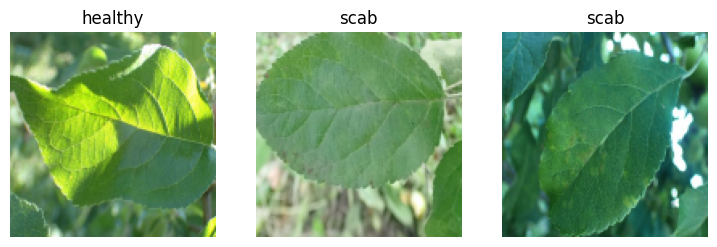

In [ ]:
# free_memory()
dls.train.show_batch(max_n=3)

In [ ]:
dls.device

device(type='cuda', index=0)

In [ ]:
f1score = F1ScoreMulti(thresh = 0.5)
loss_func = nn.BCEWithLogitsLoss()
learn = vision_learner(dls,'resnet26d', metrics = [F1ScoreMulti(thresh = 0.5)], path = model_folder).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26d-69e92c46.pth" to /root/.cache/torch/hub/checkpoints/resnet26d-69e92c46.pth


SuggestedLRs(minimum=0.017378008365631102, steep=0.02754228748381138, valley=0.0014454397605732083, slide=0.013182567432522774)

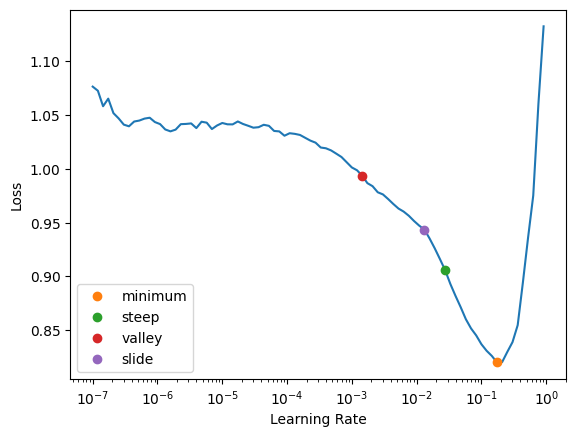

In [ ]:
learn.lr_find(suggest_funcs = (minimum, steep, valley, slide))

In [ ]:
learn.fine_tune(3, 0.03)

epoch,train_loss,valid_loss,f1_score,time
0,0.373470,0.297366,0.580458,01:52


epoch,train_loss,valid_loss,f1_score,time
0,0.208314,0.160568,0.793287,02:09
1,0.140890,0.138887,0.831866,01:55
2,0.112923,0.121546,0.849988,01:52


In [ ]:
learn.metrics = F1ScoreMulti(thresh = 0.1)

In [ ]:
learn.metrics

(#1) [<fastai.metrics.AccumMetric object at 0x7c0cb60b7550>]

In [ ]:
learn.validate()

(#2) [0.12154560536146164,0.8074026178290591]

In [ ]:
learn.metrics = F1ScoreMulti(thresh = 0.9)

In [ ]:
learn.validate()

(#2) [0.12154560536146164,0.7172658070513713]

In [ ]:
preds, targs = learn.get_preds()

In [ ]:
preds.shape, targs.shape

(torch.Size([2608, 6]), torch.Size([2608, 6]))

In [ ]:
f1score = F1ScoreMulti(thresh = None, sigmoid=False)

In [ ]:
idxs = (preds>0.5) * 1

In [ ]:
f1score(idxs, targs)

0.8499879754400913

In [ ]:
xs = torch.linspace(0.05, 0.95, 29)

In [ ]:
f1scores = [f1score((preds>i) * 1, targs) for i in xs]

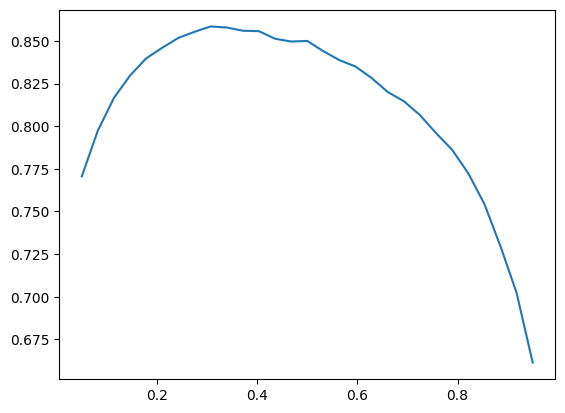

In [ ]:
plt.plot(xs, f1scores)

In [ ]:
torch.argmax(torch.tensor(f1scores))

tensor(8)

In [ ]:
xs[9]

tensor(0.3393)

In [ ]:
f1scores[9]

0.8578602370654496

In [ ]:
test_files = get_image_files(data_folder/'test/test').sorted()

In [ ]:
test_dl = learn.dls.test_dl(test_files)

In [ ]:
preds, _ = learn.tta(dl = test_dl)

In [ ]:
pred_decoded = [torch.where(pred>0.34)[0] for pred in preds]
vocab = learn.dls.vocab

In [ ]:
pred_labels = [' '.join(vocab[torch.where(pred>0.34)[0]]) for pred in preds]

In [ ]:
len(pred_labels)

5590

In [ ]:
sample_submission= pd.read_csv(data_folder/'sample_submission.csv')

In [ ]:
sample_submission = sample_submission.sort_values(by = 'image')
sample_submission.head()

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,healthy
99,test_image_100.jpg,healthy
999,test_image_1000.jpg,healthy
1000,test_image_1001.jpg,healthy


In [ ]:
sample_submission.shape

(5590, 2)

In [ ]:
sample_submission['labels'] = pred_labels
sample_submission

,image,labels
0,test_image_1.jpg,healthy
9,test_image_10.jpg,complex
99,test_image_100.jpg,frog_eye_leaf_spot
999,test_image_1000.jpg,scab
1000,test_image_1001.jpg,frog_eye_leaf_spot
...,...,...
994,test_image_995.jpg,powdery_mildew
995,test_image_996.jpg,healthy
996,test_image_997.jpg,healthy
997,test_image_998.jpg,frog_eye_leaf_spot


In [ ]:
sample_submission.to_csv(model_folder/'first_sub.csv', index = False)

In [ ]:
comp = 'inclassplantpathologysmallf23'
api.competition_submit(model_folder/'first_sub.csv', 'inclass nov27', comp)

100%|██████████| 169k/169k [00:02<00:00, 59.0kB/s]


Successfully submitted to Inclass_Plant_Pathology_Small_F23